IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
#df_1.to_csv('totale.csv', index=False)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.141540   0.034814   -0.873153   0.233984        104.0   
1      45.0 -0.140916   0.040417   -1.500476   0.245301         90.0   
2      52.0 -0.045363   0.016389   -0.495534   0.135670        101.0   
3      25.0 -0.004430   0.011621    2.584966   0.107747         60.0   
4      27.0 -0.024452   0.009771    2.396727   0.101700         88.0   
...     ...       ...        ...         ...        ...          ...   
1344   32.0 -0.022175   0.006871   -0.478585   0.085704        101.0   
1345   61.0 -0.055681   0.026057   -0.894568   0.170570          0.0   
1346   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1347   66.0  0.001478   0.007118   -0.296878   0.084282          0.0   
1348   71.0 -0.014637   0.017715    3.554045   0.133744          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            98.0   11.235387    6.653416  0.014573  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.141540   0.034814   -0.873153   0.233984        104.0         98.0   
1    -0.140916   0.040417   -1.500476   0.245301         90.0         69.0   
2    -0.045363   0.016389   -0.495534   0.135670        101.0        128.0   
3    -0.004430   0.011621    2.584966   0.107747         60.0         77.0   
4    -0.024452   0.009771    2.396727   0.101700         88.0         67.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.022175   0.006871   -0.478585   0.085704        101.0         78.0   
1345 -0.055681   0.026057   -0.894568   0.170570          0.0         83.0   
1346 -0.048472   0.006254   -0.082119   0.092673          0.0        119.0   
1347  0.001478   0.007118   -0.296878   0.084282          0.0        119.0   
1348 -0.014637   0.017715    3.554045   0.133744          0.0        118.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [7]:
#separazione da tollerabile a non_tollerabile
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]
guasto_10 = df_1[df_1['Guasto'] == 2]

print("No Guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No Guasto:  390 Guasto 5%:  418 Guasto 10%:  541


In [ ]:
#bilanciamento del dataset
balanced_d = pd.concat([no_guasto, guasto_5.sample(len(no_guasto)), guasto_10.sample(len(no_guasto))])
#balanced_d = pd.concat([tollerabile, non_tollerabile.sample(len(tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

In [8]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [9]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.141540   0.034814   -0.873153   0.233984   104.000000    98.000000   
1    -0.140916   0.040417   -1.500476   0.245301    90.000000    69.000000   
2    -0.045363   0.016389   -0.495534   0.135670   101.000000   128.000000   
3    -0.004430   0.011621    2.584966   0.107747    60.000000    77.000000   
4    -0.024452   0.009771    2.396727   0.101700    88.000000    67.000000   
...        ...        ...         ...        ...          ...          ...   
1618  0.010771   0.007645   -0.477769   0.087972    74.892568    62.075834   
1619 -0.002814   0.011488    2.728934   0.107077    55.188412    68.869529   
1620 -0.000858   0.007013   -0.243861   0.083652     0.000000   119.959560   
1621 -0.011633   0.005927   -0.259910   0.077750    84.727324    78.206590   
1622 -0.121713   0.038313   -0.376041   0.230282    76.514295    56.757147   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [10]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15, score_func=<function f_regression at 0x000002599B4BD000>)
[False False False False False False False False  True  True False  True
  True False  True False False False False False False False False False
 False False False False  True False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

In [11]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
152     <>(RPM(ESC_5))  6.571525
155    RMS(RPM(ESC_5))  4.890341
34          kurt(AccY)  4.237646
28         freq1(AccX)  2.570870
12         freq1(GyrY)  2.343755
11           RMS(GyrY)  2.148553
9            var(GyrY)  2.013902
154   kurt(RPM(ESC_5))  2.011034
93   freq2(RPM(ESC_1))  1.849693
92   freq1(RPM(ESC_1))  1.841206
14          amp1(GyrY)  1.794168
161   var(Curr(ESC_5))  1.681813
104     <>(RPM(ESC_2))  1.439662
8             <>(GyrY)  1.319717
153    var(RPM(ESC_5))  1.301476
78    amp1(RPM(ESC_0))  1.255872
32            <>(AccY)  1.218161
107    RMS(RPM(ESC_2))  1.187621
22          amp1(GyrZ)  1.032622
30          amp1(AccX)  0.907598
62         amp1(Pitch)  0.888841
76   freq1(RPM(ESC_0))  0.788567
80     <>(Curr(ESC_0))  0.689048
17           var(GyrZ)  0.686035
4          freq1(GyrX)  0.684321
77   freq2(RPM(ESC_0))  0.670786
57          var(Pitch)  0.611447
19           RMS(GyrZ)  0.554467
158   amp1(RPM(ESC_5))  0.547590
81    var(

In [12]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167]


In [13]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  freq1(AccX)  \
0     0.014573   0.004017   0.064945    71.000000    2.526027    98.000000   
1     0.027423   0.008837   0.097808   101.000000    2.031839   113.000000   
2     0.002036   0.026659   0.163085     0.000000   21.866693     0.000000   
3     0.064722   0.011245   0.124112    69.000000    1.779749   104.000000   
4    -0.008254   0.006285   0.079603   103.000000    5.482928   124.000000   
...        ...        ...        ...          ...         ...          ...   
1618  0.023232   0.005472   0.077436    91.974722    1.949319   110.075834   
1619  0.065421   0.011315   0.124759    66.000000    1.749520   116.963735   
1620  0.013093   0.005254   0.073576   107.296559    3.187452   137.000000   
1621  0.043158   0.013456   0.123613    98.371899   10.204457   113.281007   
1622  0.040440   0.010384   0.109512    97.971411    3.528546   106.728558   

      kurt(AccY)  freq1(RPM(ESC_1))  freq2(RPM(ESC_1))  <>(RPM(

In [ ]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

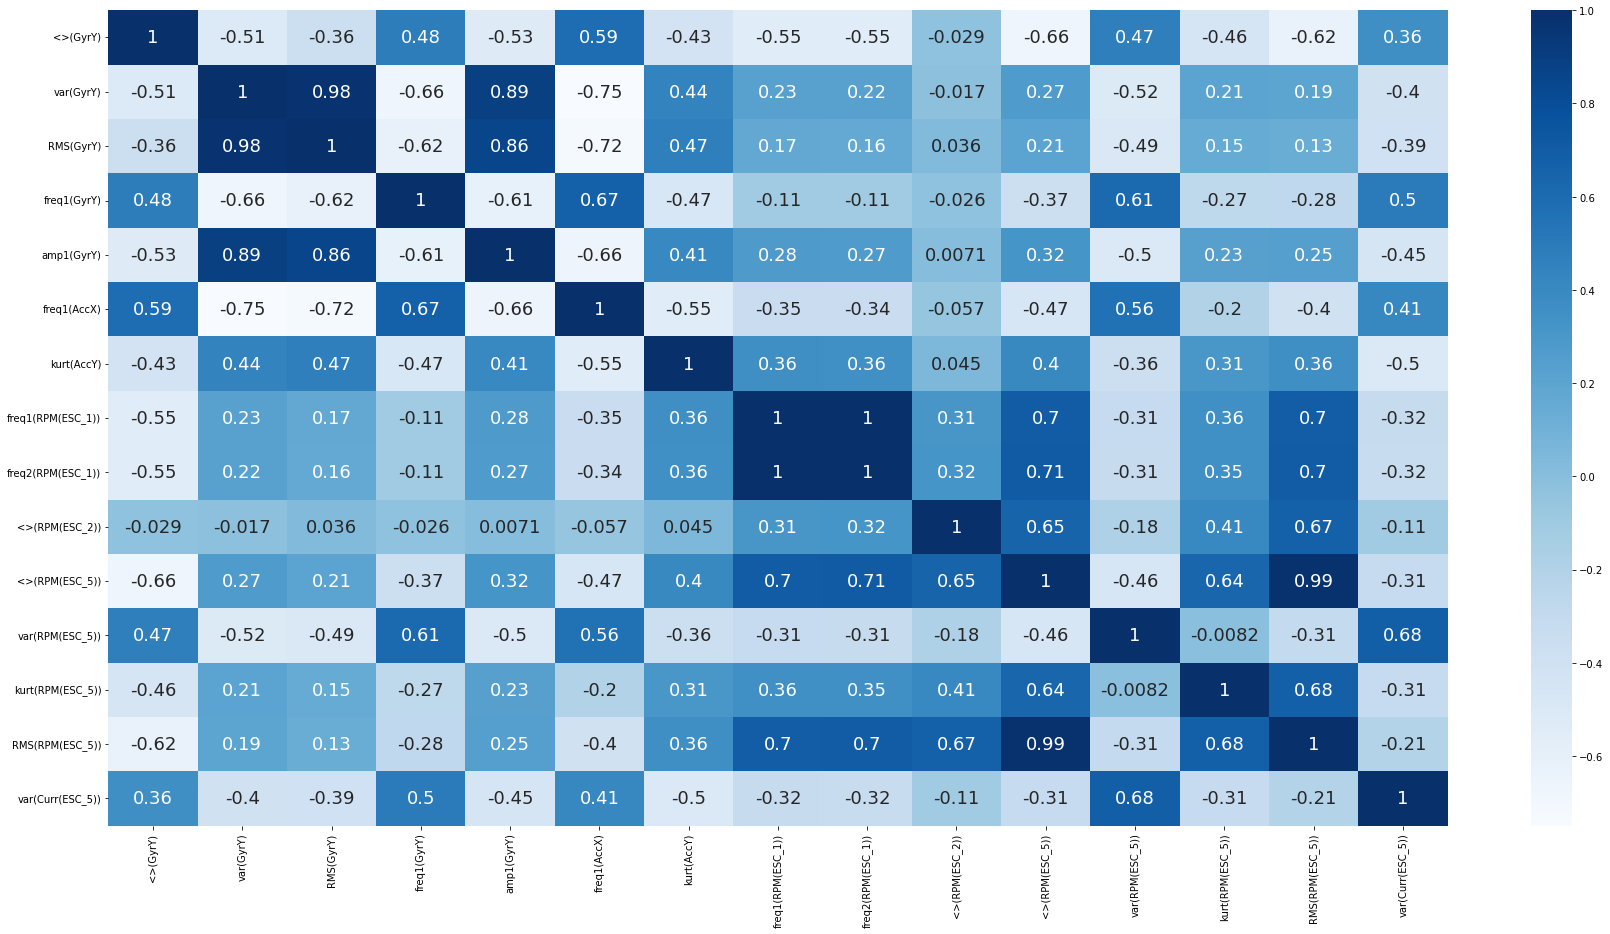

In [14]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [15]:
x = x.drop(['var(GyrY)','freq1(RPM(ESC_1))','<>(RPM(ESC_5))'], axis=1)

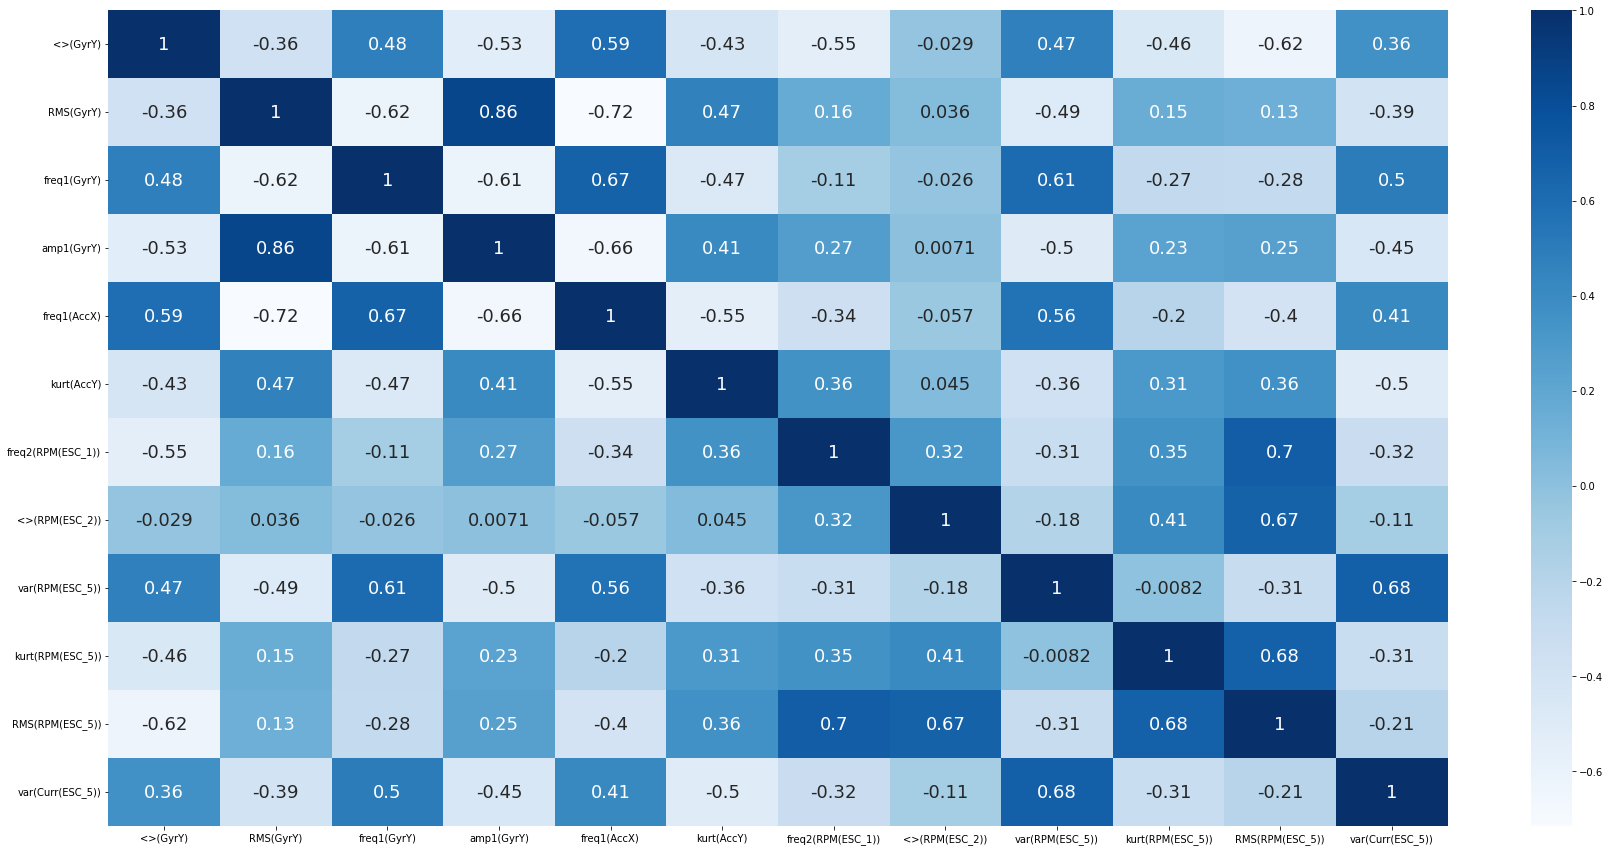

In [16]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [17]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 12)
(325, 12)
(1298, 1)
(325, 1)


In [18]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy"),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.81538462 0.83846154 0.81153846 0.75675676 0.83397683]
Accuracy: 0.83 	 ---> LogisticRegression 


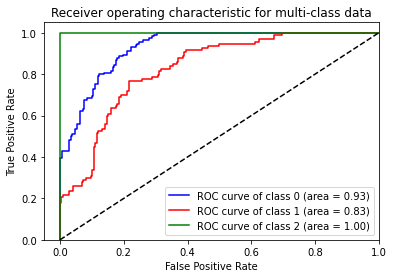

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> DecisionTreeClassifier 


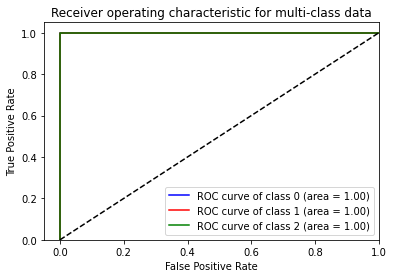

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> RandomForestClassifier 


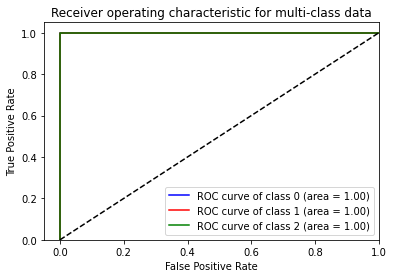

----------------------------------------------------
Cross-Validation: [1.       1.       1.       1.       0.996139]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 


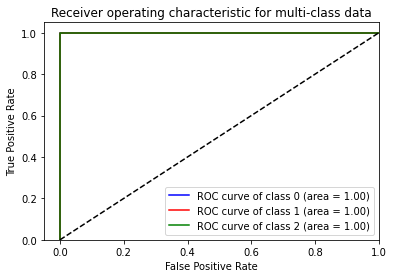

----------------------------------------------------
Cross-Validation: [1.         0.99230769 0.99615385 1.         0.96525097]
Accuracy: 1.0 	 ---> AdaBoostClassifier 


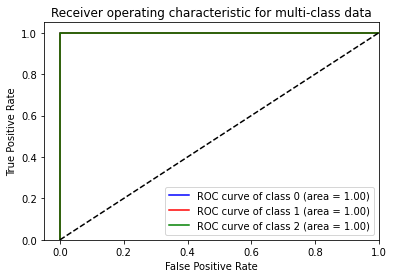

----------------------------------------------------
Cross-Validation: [1.         0.98846154 0.99615385 0.99227799 0.99227799]
Accuracy: 0.99 	 ---> LinearDiscriminantAnalysis 


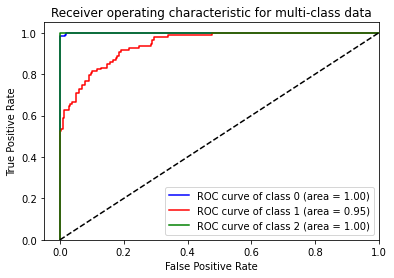

----------------------------------------------------
Cross-Validation: [0.73461538 0.73076923 0.68846154 0.77606178 0.77606178]
Accuracy: 0.74 	 ---> SVC 


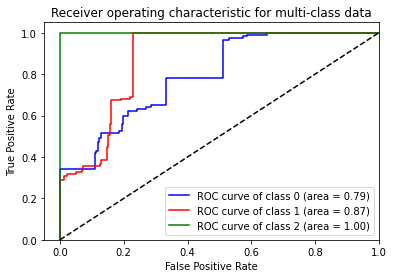

----------------------------------------------------
Cross-Validation: [0.66538462 0.5        0.67307692 0.62934363 0.41698842]
Accuracy: 0.49 	 ---> MLPClassifier 


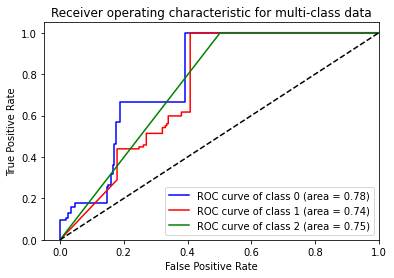

----------------------------------------------------
Cross-Validation: [0.33461538 0.60769231 0.58076923 0.61776062 0.43243243]
Accuracy: 0.32 	 ---> SGDClassifier 


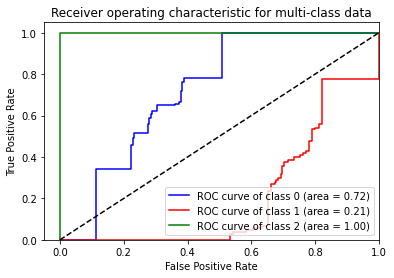

----------------------------------------------------


In [19]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    '''guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')'''    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

In [ ]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])